# First analysis of SHCP data.
## Inputs:
../inputs/Análisis_y_base_ingresos_stata_mens_v190508_v1730

In [32]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import matplotlib.dates as mdates

# import seaborn as sns                            # more plots
# sns.set()

import datetime
# from dateutil.relativedelta import relativedelta # working with dates with style
# from scipy.optimize import minimize              # for function minimization

# import statsmodels.formula.api as smf            # statistics and econometrics
# import statsmodels.tsa.api as smt
# import statsmodels.api as sm
# import scipy.stats as scs

# from itertools import product                    # some useful functions
# from tqdm import tqdm_notebook

# import warnings                                  # `do not disturbe` mode
# warnings.filterwarnings('ignore')

# %matplotlib inline

In [4]:
REVENUE_EXCEL = '../inputs/bases_iniciales/Análisis_y_base_ingresos_stata_mens_v190508_v1730.xlsx'
params={
    
}

In [41]:
revenue_df = pd.read_excel(REVENUE_EXCEL)

In [42]:
revenue_df.columns

Index(['anio', 'mes_n', 'mes', 'rfc_u', 'ing_tot_brut', 'ing_neto',
       'ing_trib_brut', 'ing_trib_neto', 'ing_no_trib_bruto',
       'ing_no_trib_neto', 'iva_bruto', 'iva_neto', 'iva_dev', 'iva_comp',
       'iva_regu', 'isr_bruto', 'isr_dev', 'isr_comp', 'isr_reg', 'isr_neto',
       'ieps_bruto', 'ieps_neto', 'ieps_dev', 'ieps_comp', 'ieps_reg', 'inpc',
       'pib_real', 'tiempo', 'iva_bruto_r', 'iva_neto_r', 'iva_comp_r',
       'iva_dev_r', 'iva_reg_r', 'iva_dev_comp_r', 'isr_bruto_r', 'isr_neto_r',
       'isr_comp_r', 'isr_dev_r', 'isr_reg_r', 'isr_dev_comp_r', 'ef_ivabruto',
       'ef_isrbruto', 'iva_comp_perc', 'iva_dev_perc', 'iva_sum_dc_perc',
       'isr_comp_perc', 'isr_dev_perc', 'isr_sum_dc_perc', 'iva_isr_dc_perc',
       'crec_iva_br', 'crec_isr_br', 'crec_pib_r', 'crec_iva_neto',
       'crec_isr_neto', 'elast_iva', 'elast_isr', 'elast_iva_neto',
       'elast_isr_neto', 'iva_b_est', 'crec_iva_esp', 'isr_b_est',
       'crec_isr_esp'],
      dtype='object')

In [45]:
revenue_df.rename(columns={'anio': 'year', 'mes':'month'}, inplace=True)
revenue_df['day'] = 1
revenue_df['date'] = pd.to_datetime(revenue_df[['year', 'month', 'day']])
revenue_df.set_index('date', inplace=True)

In [110]:
gross_income_cols = ['ing_tot_brut', 'ing_trib_brut', 'ing_no_trib_bruto']
taxes = ['ing_trib_', 'iva_', 'isr_', 'ieps_']
gross_tax_income_cols = [col+'brut' if col == 'ing_trib_' else col+'bruto' for col in taxes]
net_tax_income_cols = [col+'neto' for col in taxes]

In [47]:
revenue_df.shape

(72, 63)

In [23]:
revenue_df.iloc[:,:10].head()

,anio,mes_n,mes,rfc_u,ing_tot_brut,ing_neto,ing_trib_brut,ing_trib_neto,ing_no_trib_bruto,ing_no_trib_neto
0,2014,Enero,1,882394.0,3.405453e+11,2.892959e+11,2.586165e+11,2.077721e+11,8.192880e+10,8.152378e+10
1,2014,Febrero,2,569501.0,2.482582e+11,2.041606e+11,1.711537e+11,1.272196e+11,7.710456e+10,7.694101e+10
2,2014,Marzo,3,875796.0,3.054287e+11,2.382145e+11,2.155817e+11,1.486188e+11,8.984697e+10,8.959569e+10
3,2014,Abril,4,1566558.0,3.252037e+11,2.583345e+11,2.365843e+11,1.713994e+11,8.861940e+10,8.693508e+10
4,2014,Mayo,5,1390705.0,2.718245e+11,2.123017e+11,1.918704e+11,1.327462e+11,7.995409e+10,7.955550e+10


In [24]:
revenue_df.iloc[:,10:20].head()

,iva_bruto,iva_neto,iva_dev,iva_comp,iva_regu,isr_bruto,isr_dev,isr_comp,isr_reg,isr_neto
0,9.348197e+10,6.908305e+10,1.572581e+10,8.500086e+09,173016804.0,1.290628e+11,1.026349e+09,3.485378e+09,6.527837e+09,1.165338e+11
1,7.727268e+10,5.354083e+10,1.508302e+10,8.393792e+09,255033695.0,7.839744e+10,1.760122e+09,5.912287e+09,2.358310e+09,6.680040e+10
2,7.700909e+10,4.662275e+10,2.068642e+10,9.393782e+09,306140814.0,1.159531e+11,1.606394e+09,1.982141e+10,2.094186e+09,9.038947e+10
3,8.289620e+10,5.615982e+10,1.501912e+10,1.132188e+10,395373624.0,1.346847e+11,6.180484e+09,1.455658e+10,1.808616e+09,1.105751e+11
4,8.334124e+10,5.502021e+10,1.931914e+10,8.711028e+09,290870417.0,8.978206e+10,6.443876e+09,1.024013e+10,2.427402e+09,6.901285e+10


In [25]:
revenue_df.iloc[:,20:30].head()

,ieps_bruto,ieps_neto,ieps_dev,ieps_comp,ieps_reg,inpc,pib_real,tiempo,iva_bruto_r,iva_neto_r
0,1.610997e+10,1.289474e+10,336962608.0,205174790.0,12151037.0,0.815316,16135623.0,21916.000007,114657.273438,84731.578125
1,9.719391e+09,4.702305e+09,8664053.0,185050298.0,24383247.0,0.817382,16135623.0,21916.000008,94536.812500,65502.835938
2,9.770266e+09,4.907060e+09,2103334.0,166476124.0,37462816.0,0.819621,16135623.0,21916.000008,93956.937500,56883.296875
3,1.157720e+10,4.889606e+09,2729453.0,201427242.0,35040386.0,0.818092,16736983.0,21916.000008,101328.679688,68647.312500
4,1.264781e+10,6.123628e+09,32187.0,251506741.0,38826027.0,0.815476,16736983.0,21916.000008,102199.515625,67470.054688


In [26]:
revenue_df.iloc[:,30:40].head()

,iva_comp_r,iva_dev_r,iva_reg_r,iva_dev_comp_r,isr_bruto_r,isr_neto_r,isr_comp_r,isr_dev_r,isr_reg_r,isr_dev_comp_r
0,10425.504883,19287.982422,212.208145,29713.488281,158297.750000,142930.718750,4274.877930,1258.834717,8006.506836,5533.712891
1,10269.119141,18452.843750,312.012909,28721.962891,95912.867188,81724.843750,7233.200195,2153.364990,2885.199707,9386.565430
2,11461.126953,25238.998047,373.515015,36700.125000,141471.562500,110282.015625,24183.621094,1959.922119,2555.065674,26143.542969
3,13839.373047,18358.712891,483.287415,32198.085938,164632.656250,135162.171875,17793.324219,7554.752930,2210.773193,25348.078125
4,10682.139648,23690.626953,356.687927,34372.765625,110097.750000,84628.921875,12557.247070,7901.981934,2976.669434,20459.228516


In [27]:
revenue_df.iloc[:,40:50].head()

,ef_ivabruto,ef_isrbruto,iva_comp_perc,iva_dev_perc,iva_sum_dc_perc,isr_comp_perc,isr_dev_perc,isr_sum_dc_perc,iva_isr_dc_perc,crec_iva_br
0,0.007106,0.009810,0.090928,0.168223,0.259150,0.027005,0.121846,0.034958,0.129132,NaN
1,0.005859,0.005944,0.108626,0.195192,0.303818,0.075414,0.192392,0.097866,0.200098,NaN
2,0.005823,0.008768,0.121983,0.268623,0.390606,0.170943,0.178403,0.184797,0.266933,NaN
3,0.006054,0.009836,0.136579,0.181180,0.317759,0.108079,0.111513,0.153967,0.216370,NaN
4,0.006106,0.006578,0.104522,0.231808,0.336330,0.114055,0.215178,0.185828,0.258279,NaN


In [28]:
revenue_df.iloc[:,50:60].head()

,crec_isr_br,crec_pib_r,crec_iva_neto,crec_isr_neto,elast_iva,elast_isr,elast_iva_neto,elast_isr_neto,iva_b_est,crec_iva_esp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114657.273438,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94536.812500,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93956.937500,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101328.679688,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102199.515625,NaN


In [29]:
revenue_df.iloc[:,60:70].head()

,isr_b_est,crec_isr_esp
0,158297.750000,NaN
1,95912.867188,NaN
2,141471.562500,NaN
3,164632.656250,NaN
4,110097.750000,NaN


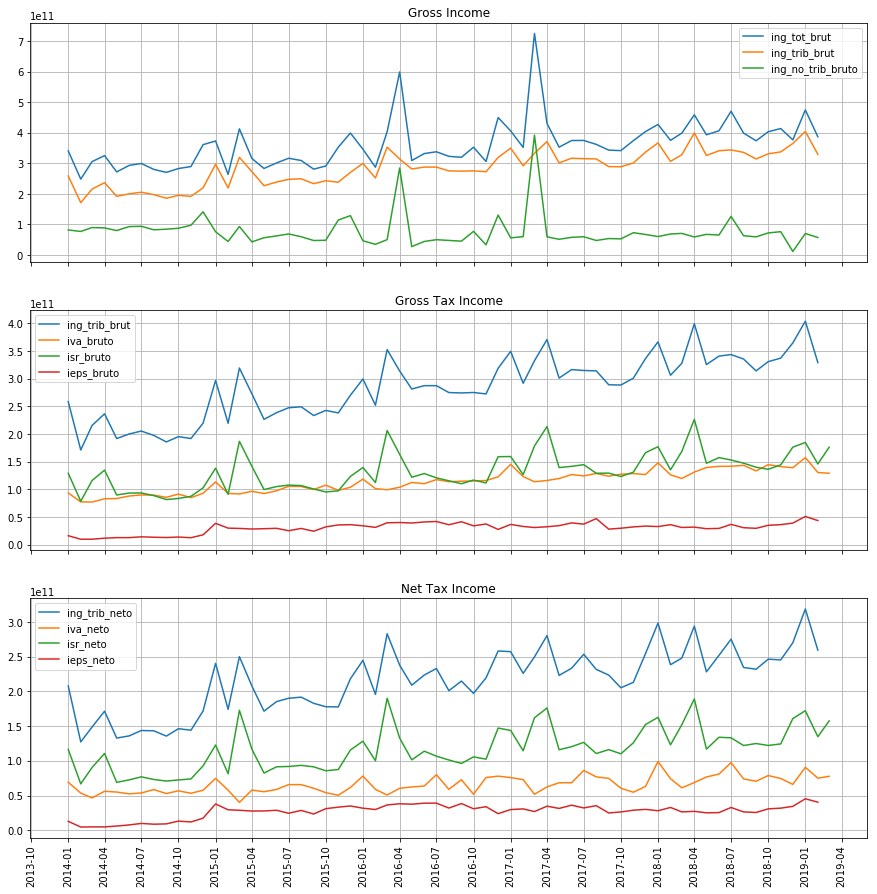

In [132]:
years = mdates.YearLocator()   # every year
quarters = mdates.MonthLocator(bymonth = range(1, 13, 3))  # every month
date_fmt = mdates.DateFormatter('%Y-%m')
fig, ax = plt.subplots(nrows=3, figsize=(15,15), sharex=True)
plot_names = ['Gross Income', 'Gross Tax Income', 'Net Tax Income']
for i, cols_to_plot in enumerate([gross_income_cols, gross_tax_income_cols, net_tax_income_cols]):
    ax[i].plot(revenue_df[cols_to_plot])
    ax[i].legend(cols_to_plot)
    ax[i].xaxis.set_major_locator(quarters)
    ax[i].xaxis.set_major_formatter(date_fmt)
    ax[i].grid()
    ax[i].set_title(plot_names[i])
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(90)
plt.show()

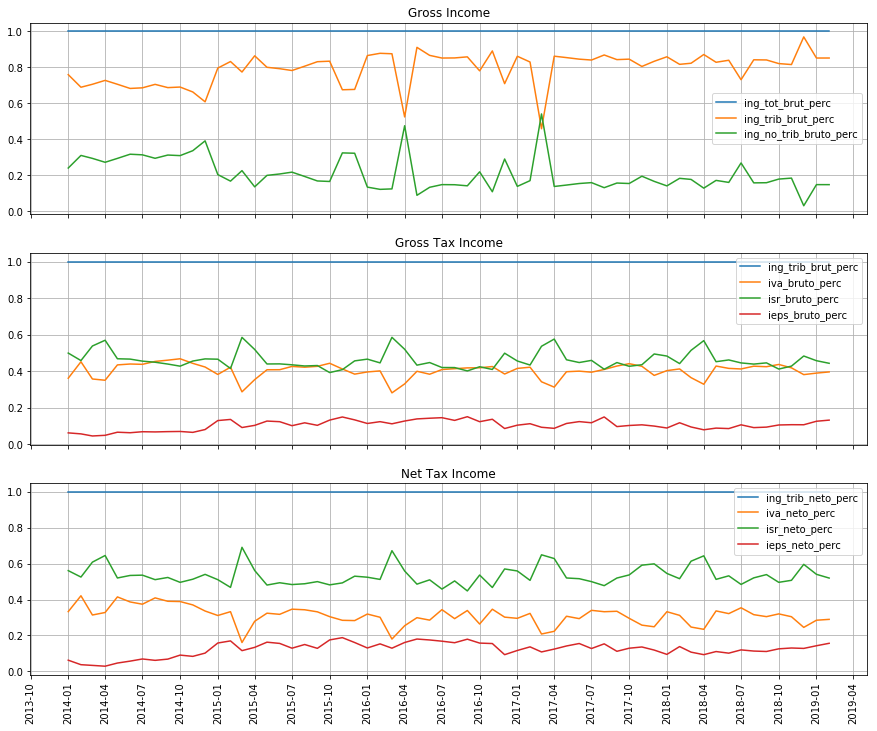

In [144]:
years = mdates.YearLocator()   # every year
quarters = mdates.MonthLocator(bymonth = range(1, 13, 3))  # every month
date_fmt = mdates.DateFormatter('%Y-%m')
fig, ax = plt.subplots(nrows=3, figsize=(15,12), sharex=True)
plot_names = ['Gross Income', 'Gross Tax Income', 'Net Tax Income']
for i, cols_to_plot in enumerate([gross_income_cols, gross_tax_income_cols, net_tax_income_cols]):
    to_plot = revenue_df[cols_to_plot].div(revenue_df[cols_to_plot[0]], axis=0)
    ax[i].plot(to_plot)
    ax[i].legend(to_plot.add_suffix('_perc').columns)
    ax[i].xaxis.set_major_locator(quarters)
    ax[i].xaxis.set_major_formatter(date_fmt)
    ax[i].grid()
    ax[i].set_title(plot_names[i])
    for tick in ax[i].get_xticklabels():
        tick.set_rotation(90)
plt.show()